In [1]:
import numpy as np
from matplotlib import pyplot as plt

import DPO7354C as scope
scope.init("192.168.0.219")
import os


*IDN?
TEKTRONIX,DPO7354C,C140419,CF:91.1CT FV:7.6.0 Build 7
successfully connected to Tektronix scope!


In [2]:
# the function in my_utils

def write_csv(filename,vector_list,**kwargs):
  delimiter = kwargs.get("delimiter",", ")
  cols = len(vector_list)
  #print(cols)
  rows = len(vector_list[0])
  #print(rows)
  formatstring = ("{:e}"+delimiter)*(cols-1)+ "{:e}" + "\n"
  with open(filename,"w") as f:
    for i in range(len(vector_list[0])):
      values = []
      for j in range(cols):
        values += [vector_list[j][i]]
      f.write(formatstring.format(*values))
    f.close()

In [3]:
##################################################
##           configure Tek Scope                ##
##################################################


s = {
    "test"   :"CH1", 
    #"ref"    :"CH1", 
}



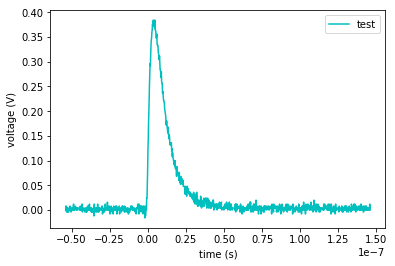

In [4]:
##################################################
##              capture waveforms               ##
##################################################

time, wfm = scope.capture_waveforms([
    s["test"],
  ],
    average=1
)

##################################################
##                     plot                     ##
##################################################


plt.plot(time, wfm[s["test"]], "c" ,label="test")
plt.legend()
plt.xlabel("time (s)")
plt.ylabel("voltage (V)")
plt.show()

In [5]:
data_dir="./measurement_A"

if(not(os.path.isdir(data_dir))):
    os.mkdir(data_dir)


imax = 100
    
for i in range(0,imax):
    
    print("\rrec wfm no {:04d}/{:04d}".format(i+1,imax),end="")

    time, wfm = scope.capture_waveforms([
        s["test"],
      ],
        average=1
    )
    waveform = wfm[s["test"]]

    write_csv(data_dir+"/"+"wfm_{:04d}.csv".format(i),  [time,waveform])
    
print("\ndone")

rec wfm no 0100/0100
done
